In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load, encoding="ISO-8859-1")
ride_data_df = pd.read_csv(ride_data_to_load, encoding="ISO-8859-1")
#ride_data_df


In [2]:
# Combine the data into a single dataset
combo_data=ride_data_df.merge(city_data_df, how='left', on='city', left_on=None, right_on=None, 
                left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), 
                copy=True, indicator=False, validate=None)
# Display the data table for preview
combo_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#Seperate city types into new dataframes by city type
urban_df = combo_data.loc[(combo_data['type']=='Urban')]
#check size of df
print(urban_df.shape)
suburban_df = combo_data.loc[(combo_data['type']=='Suburban')]
#check size of df
print(suburban_df.shape)
rural_df = combo_data.loc[(combo_data['type']=='Rural')]
#check size of df
print(rural_df.shape)

(1625, 6)
(625, 6)
(125, 6)


In [4]:
#Obtain the x and y coordinates for each of the three city types
#Create dataframes to find the following
#* Average Fare ($) Per City
avg_fare_urban = urban_df.groupby('city').fare.mean()
avg_fare_suburban = suburban_df.groupby('city').fare.mean()
avg_fare_rural = rural_df.groupby('city').fare.mean()

#* Total Number of Rides Per City
total_rides_urban = urban_df.groupby('city').city.count()
total_rides_suburban = suburban_df.groupby('city').city.count()
total_rides_rural = rural_df.groupby('city').city.count()

#* Total Number of Drivers Per City
#remove the duplicate cities 
remove_dups_urban = urban_df.drop_duplicates(subset=['city'], keep='first')
total_drivers_urban = remove_dups_urban.groupby('city').driver_count.sum()
remove_dups_suburban = suburban_df.drop_duplicates(subset=['city'], keep='first')
total_drivers_suburban = remove_dups_suburban.groupby('city').driver_count.sum()
remove_dups_rural = rural_df.drop_duplicates(subset=['city'], keep='first')
total_drivers_rural = remove_dups_rural.groupby('city').driver_count.sum()


## Bubble Plot of Ride Sharing Data

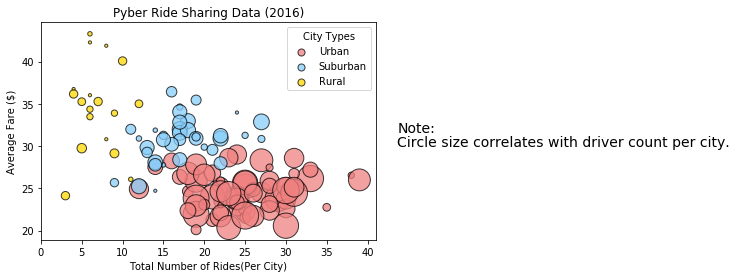

In [5]:
# Build the scatter plots for each city types
plt.scatter(total_rides_urban, avg_fare_urban, total_drivers_urban*10,
            alpha = .75, c="lightcoral",edgecolors="black", label = "Urban")
plt.scatter(x=total_rides_suburban, y=avg_fare_suburban, s=total_drivers_suburban*10,
            alpha = .75, c="lightskyblue",edgecolors="black", label = "Suburban")
plt.scatter(x=total_rides_rural, y=avg_fare_rural, s=total_drivers_rural*10,
            alpha = .75, c="gold",edgecolors="black", label = "Rural")
# Incorporate the other graph properties
plt.xlim(0,41)

# Create a legend
legend = plt.legend(title = "City Types", loc='upper right')
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Set a Title and labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
textstr1 = "Note:"
plt.text(.95, 0.5, textstr1, fontsize=14, transform=plt.gcf().transFigure)
textstr2 = "Circle size correlates with driver count per city."
plt.text(.95, 0.45, textstr2, fontsize=14, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('Bubble Plot of Ride Sharing Data.png',dpi=100, bbox_inches = "tight")

# Show plot
plt.show()



## Total Fares by City Type

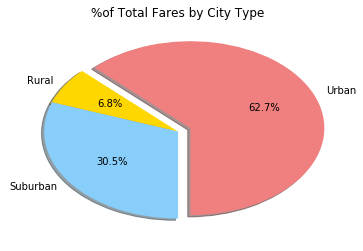

In [6]:
# Calculate the total fares per city type
total_fare_urban = urban_df['fare'].sum()
total_fare_suburban = suburban_df['fare'].sum()
total_fare_rural = rural_df['fare'].sum()

# Calculate the total fares of the combined data
total_fare = combo_data['fare'].sum()

#percent calculation = total fare/fares per city type divided by 100
percent_fare_urban = total_fare_urban/total_fare *100
percent_fare_suburban = total_fare_suburban/total_fare *100
percent_fare_rural = total_fare_rural/total_fare *100

# Build Pie Chart
city_types = ["Urban","Rural","Suburban"]
percents = [percent_fare_urban,percent_fare_rural,percent_fare_suburban]
colors = ["lightcoral","gold","lightskyblue"]
explode = [.1,0,0]
plot1 = plt.pie(percents, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("%of Total Fares by City Type")

# Save Figure
plt.savefig('Pie Chart - Total Fares by City Type.png',dpi=100, bbox_inches = "tight")

# Save Figure
plt.show()

## Total Rides by City Type

In [7]:
# Calculate Ride Percents
total_ride_urban = urban_df['ride_id'].count()
total_ride_suburban = suburban_df['ride_id'].count()
total_ride_rural = rural_df['ride_id'].count()
total_ride = combo_data['ride_id'].count()

percent_ride_urban = total_ride_urban/total_ride *100
percent_ride_suburban = total_ride_suburban/total_ride *100
percent_ride_rural = total_ride_rural/total_ride *100

print(percent_ride_urban)
print(percent_ride_suburban)
print(percent_ride_rural)

68.42105263157895
26.31578947368421
5.263157894736842


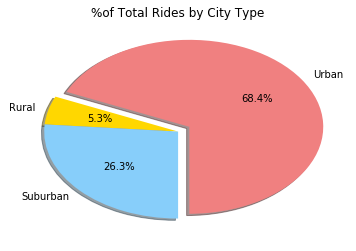

In [8]:
# Build Pie Chart
city_types = ["Urban","Rural","Suburban"]
percent_rides = [percent_ride_urban,percent_ride_rural,percent_ride_suburban]
colors = ["lightcoral","gold","lightskyblue"]
explode = [.1,0,0]
plot2 = plt.pie(percent_rides, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("%of Total Rides by City Type")

# Save Figure
plt.savefig('Pie Chart - Total Rides by City Type.png',dpi=100, bbox_inches = "tight")

# Save Figure
plt.show()

## Total Drivers by City Type

In [9]:
# Calculate Driver Percents
urban_drivers = remove_dups_urban['driver_count'].sum()
suburban_drivers = remove_dups_suburban['driver_count'].sum()
rural_drivers = remove_dups_rural['driver_count'].sum()

total_driver = city_data_df['driver_count'].sum()


percent_driver_urban = urban_drivers/total_driver *100
percent_driver_suburban = suburban_drivers/total_driver *100
percent_driver_rural = rural_drivers/total_driver *100

percent_driver_urban

80.89471913891691

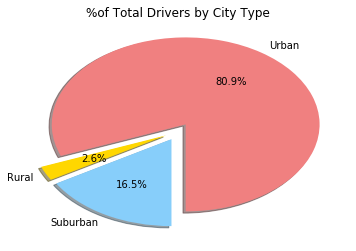

In [10]:
# Build Pie Chart
city_types = ["Urban","Rural","Suburban"]
percent_driver = [percent_driver_urban,percent_driver_rural,percent_driver_suburban]
colors = ["lightcoral","gold","lightskyblue"]
explode = [0.1,0.1,0.1]
plot3 = plt.pie(percent_driver, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("%of Total Drivers by City Type")

# Save Figure
plt.savefig('Pie Chart - Total Drivers by City Type.png',dpi=100, bbox_inches = "tight")

# Show Figure
plt.show()